**<center><font size='+1.5' color='green'>"Bank Customer Churn Prediction: A Comparative Analysis Using Machine Learning Classification Models"</font></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the Dataset

In [2]:
churn_data = pd.read_csv('./Churn_Modelling.csv')
churn_data

,RowNo,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


- We will be removing the unncessary column names such as RowNumber, CustomerId, Surname, Geography, Gender, Age and create a new dataset to train and test our model

In [3]:
churn_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
churn_features = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

churn_df = churn_data[churn_columns]
churn_feature_df = churn_df[churn_features]
churn_df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# plt.scatter(churn_df['Balance'], churn_df['Exited'], color='red', marker='.')
# plt.xlabel("Tenure")
# plt.ylabel("Exited")
# plt.title("Scatter Plot of Tenure vs Balance (First 200 Samples)")
# plt.show()

In [5]:
X = churn_feature_df
y = churn_df["Exited"]

### Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(X)

# Transform features
X_scaled = scaler.transform(X)

# Create DataFrame from scaled features
df_scaled = pd.DataFrame(X_scaled, columns=['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])

# Print the DataFrame
df_scaled.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243
1,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243
2,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670
3,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670
4,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243


#### Divide Data into Test and Train Sets

In [7]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,y,train_size=.7,random_state=25)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled)/len(X)*100)}% Test size: {round(len(X_test_scaled)/len(X)*100)}%")
print(X_train_scaled.shape)
print(X_test_scaled.shape)

Train size: 70% Test size: 30%
(7000, 6)
(3000, 6)


### Modelling of Scaled Data
- Kernel Types
    - 1. Linear
    - 2. Polynomial
    - 3. Sigmoid
    - 4. Radial Basis Function (RBF)-> (Default Kernel)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grids for each model
svm_param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
tree_param_grid = {'max_depth': [3, 5, 7, 10]}
knear_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
rforest_param_grid = {'n_estimators': [10, 20, 30], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# Instantiate the models
svm = SVC(class_weight='balanced')
tree = DecisionTreeClassifier(class_weight='balanced')
knear = KNeighborsClassifier()
rforest = RandomForestClassifier(criterion="entropy")

# Instantiate GridSearchCV for each model
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')
tree_grid_search = GridSearchCV(tree, tree_param_grid, cv=5, scoring='accuracy')
knear_grid_search = GridSearchCV(knear, knear_param_grid, cv=5, scoring='accuracy')
rforest_grid_search = GridSearchCV(rforest, rforest_param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning for each model
svm_grid_search.fit(X_train_scaled, y_train)
tree_grid_search.fit(X_train_scaled, y_train)
knear_grid_search.fit(X_train_scaled, y_train)
rforest_grid_search.fit(X_train_scaled, y_train)

# Get the best models
best_svm = svm_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_
best_knear = knear_grid_search.best_estimator_
best_rforest = rforest_grid_search.best_estimator_

# Make predictions with the best models
best_svm_predictions = best_svm.predict(X_test_scaled)
best_tree_predictions = best_tree.predict(X_test_scaled)
best_knear_predictions = best_knear.predict(X_test_scaled)
best_rforest_predictions = best_rforest.predict(X_test_scaled)

# Calculate accuracy with the best models
best_svm_accuracy = accuracy_score(y_test, best_svm_predictions)
best_tree_accuracy = accuracy_score(y_test, best_tree_predictions)
best_knear_accuracy = accuracy_score(y_test, best_knear_predictions)
best_rforest_accuracy = accuracy_score(y_test, best_rforest_predictions)

print("--------------------------------------------------------------------------------\n")
# Print accuracy and classification report for each model
print("Support Vector Machine:")
print("Best parameters:", svm_grid_search.best_params_)
print("Accuracy: {:.2f}%".format(best_svm_accuracy * 100))
print("Classification Report:\n", classification_report(y_test, best_svm_predictions))
print("--------------------------------------------------------------------------------\n")

print("\nDecision Tree:")
print("Best parameters:", tree_grid_search.best_params_)
print("Accuracy: {:.2f}%".format(best_tree_accuracy * 100))
print("Classification Report:\n", classification_report(y_test, best_tree_predictions))
print("--------------------------------------------------------------------------------\n")

print("\nK-Nearest Neighbors:")
print("Best parameters:", knear_grid_search.best_params_)
print("Accuracy: {:.2f}%".format(best_knear_accuracy * 100))
print("Classification Report:\n", classification_report(y_test, best_knear_predictions))
print("--------------------------------------------------------------------------------\n")

print("\nRandom Forest:")
print("Best parameters:", rforest_grid_search.best_params_)
print("Accuracy: {:.2f}%".format(best_rforest_accuracy * 100))
print("Classification Report:\n", classification_report(y_test, best_rforest_predictions))
print("--------------------------------------------------------------------------------\n")

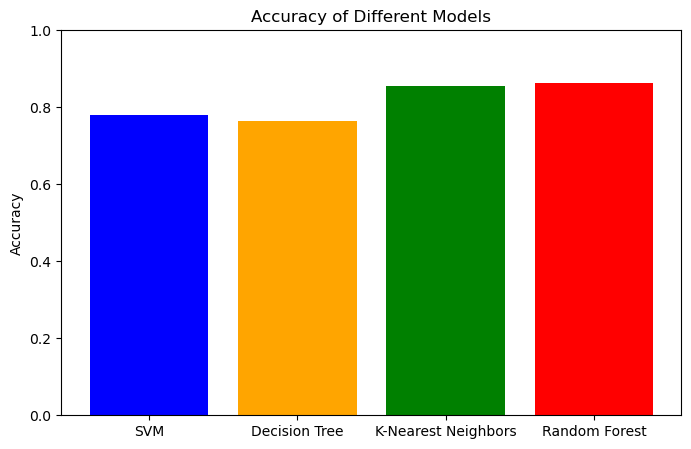

In [14]:
import matplotlib.pyplot as plt

# Models
models = ['SVM', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest']
accuracies = [best_svm_accuracy, best_tree_accuracy, best_knear_accuracy, best_rforest_accuracy]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (for percentage)
plt.show()

#### Checking Individual Prediction

In [2]:
import numpy as np

# Reshape the input into a 2D array
new_data = np.array([9,0,2,1,1,14406.41]).reshape(1, -1)

# Make prediction
svm_predictions = best_svm.predict(new_data)
tree_predictions = best_tree.predict(new_data)
knear_predictions = best_knear.predict(new_data)
rforest_predictions = best_rforest.predict(new_data)


# Print the prediction
print(svm_predictions)
print(tree_predictions)
print(knear_predictions)
print(rforest_predictions)

NameError: name 'best_svm' is not defined